Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [3]:
x = pd.DataFrame(data, columns=feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [15]:
pca.fit(x_train_scaled)

PCA(random_state=42)

In [16]:
pca.explained_variance_ratio_

array([0.46365886, 0.11401877, 0.09775484, 0.06702416, 0.06538962,
       0.05115833, 0.04108269, 0.03042998, 0.02084603, 0.01702393,
       0.01379156, 0.01293276, 0.00488848])

In [17]:
np.sum(pca.explained_variance_ratio_[:7])

0.9000872688820891

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

x_train_tsne = tsne.fit_transform(x_train_scaled)
x_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [20]:
x_train_tsne.shape

(404, 2)

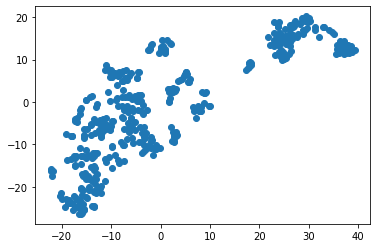

In [30]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [49]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = model.fit_predict(x_train_scaled)
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

Text(-10, -20, '№3')

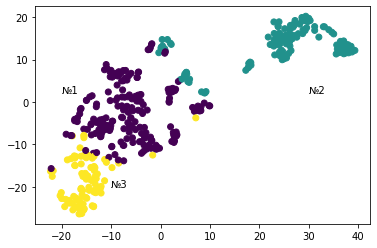

In [50]:
labels_test = model.predict(x_train_scaled)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:,1], c=labels_train)
plt.text(-20, 2, '№1')
plt.text(30, 2, '№2')
plt.text(-10, -20, '№3')

In [51]:
y_train.mean()

price    22.796535
dtype: float64

In [61]:
x_train.mean()

CRIM         3.609125
ZN          11.569307
INDUS       10.985050
CHAS         0.071782
NOX          0.556484
RM           6.315891
AGE         68.556436
DIS          3.808195
RAD          9.356436
TAX        404.032178
PTRATIO     18.318317
B          356.278342
LSTAT       12.457351
dtype: float64

*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [56]:
y_train.loc[labels_train==0].mean()

price    24.958115
dtype: float64

In [57]:
y_train.loc[labels_train==1].mean()

price    16.165354
dtype: float64

In [58]:
y_train.loc[labels_train==2].mean()

price    27.788372
dtype: float64

In [59]:
x_train.loc[labels_train==0, 'CRIM'].mean()

0.42166020942408367

In [62]:
x_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [63]:
x_train.loc[labels_train==2, 'CRIM'].mean()

0.07356558139534886